In [2]:
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
from utils import load_stops_as_dict
from utils import load_stop_times_df
import requests
import json


can't open US_Oregon_Redmond


Text(0.5, 1.0, 'Number of busstops')

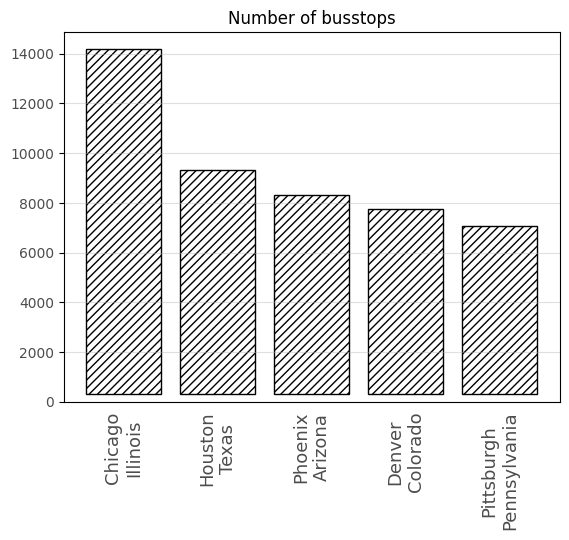

In [3]:
# check total numbers of unique stops

all_cities = glob.glob("data/*")
all_cities.pop(0)

all_cities = [os.path.basename(i) for i in all_cities] # convert full path to only the city name


counting = {} 

for i in all_cities:

    name = i.replace("US_", "")
    name = name.replace("_", ", ")
    name = name.split(" ")
    name = str(name[1]) + "\n" + str(name[0])
    name = name[:-1]

    try:
        all_stops = load_stops_as_dict(i)
    except:
        print("can't open", i)
        pass
 
    counting[name] = len(all_stops.keys())


stops_res_dict = dict(sorted(counting.items(), key=lambda x: x[1], reverse = True))

# plt
names, counts = zip(*stops_res_dict.items())
plt.xticks(rotation=90, ha='center', fontsize = 13, alpha = 0.7)
plt.yticks(fontsize = 10, alpha = 0.7)
plt.bar(names[0:5], counts[0:5], color = "white", edgecolor = "black", clip_on = False, bottom=[300, 300, 300, 300, 300], hatch = "////")
plt.ylim(ymin=0)
plt.grid(which = "major", axis = "y", alpha = 0.4)
plt.box(True)
plt.tick_params(bottom = False)
plt.tick_params(right = False, left = True)
#plt.gca().yaxis.get_major_ticks()[0].label1.set_visible(False)
plt.title("Number of busstops")

can't open data\US_California_Anaheim
can't open data\US_California_Dixon
can't open data\US_California_Monrovia
can't open data\US_California_Wasco
can't open data\US_Oregon_Redmond
{'Pinellas\nFlorida': 1.895326, 'Phoenix\nArizona': 1.759228, 'Houston\nTexas': 1.57457, 'Honolulu\nHawaii': 1.396349, 'Seattle\nWashington': 0.984812, 'Washington\nWashington': 0.984812, 'Pittsburgh\nPennsylvania': 0.899912, 'Denver\nColorado': 0.74459, 'Montgomery\nMaryland': 0.718876, 'Chicago\nIllinois': 0.619019, 'St.,\nMissouri': 0.478187, 'Salt,\nUtah': 0.440231, 'Riverside\nCalifornia': 0.420863, 'Madison\nWisconsin': 0.404712, 'Cincinnati\nOhio': 0.369263, 'Fairfax\nVirginia': 0.33608, 'Columbus\nOhio': 0.318814, 'Urbana\nIllinois': 0.274388, 'Louisville\nKentucky': 0.272973, 'Carolina,\nSouth': 0.270956, 'Fort,\nColorado': 0.25825, 'Allentown\nPennsylvania': 0.242824, 'Dayton\nOhio': 0.230684, 'Redmond\nVirginia': 0.217232, 'Kansas,\nMissouri': 0.203326, 'Palm,\nFlorida': 0.178496, 'Muncie\nIndia

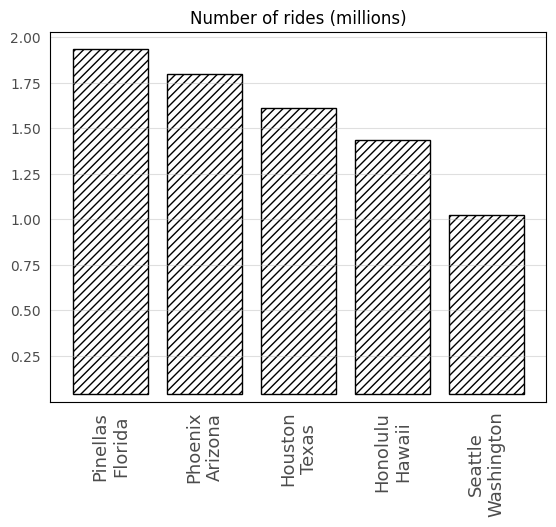

In [4]:
# total number of fares per city
# TODO achsenbeschirftungen und bottom

all_cities = glob.glob("data/*")
all_cities.pop(0)

counting = {} 

for i in all_cities:

    name = os.path.basename(i)
    name = name.replace("US_", "")
    name = name.replace("_", ", ")
    name = name.split(" ")
    name = str(name[1]) + "\n" + str(name[0])
    name = name[:-1]

    try:
        counting[name] = len([line for line in open(i + "/stop_times.txt")]) / 1000000 
    except:
        print("can't open", i)
        pass


trips_res_dict = dict(sorted(counting.items(), key=lambda x: x[1], reverse = True))

print(trips_res_dict)


# plt
names, counts = zip(*trips_res_dict.items())
plt.xticks(rotation=90, ha='center', fontsize = 13, alpha = 0.7)
plt.yticks(fontsize = 10, alpha = 0.7)
plt.bar(names[0:5], counts[0:5], color = "white", edgecolor = "black", clip_on = False, bottom=[0.04]*5, hatch = "////")
plt.ylim(ymin=0)
plt.grid(which = "major", axis = "y", alpha = 0.4)
plt.box(True)
plt.tick_params(bottom = False)
plt.tick_params(left = False)
plt.gca().yaxis.get_major_ticks()[0].label1.set_visible(False)
plt.title("Number of rides (millions)")
plt.show()

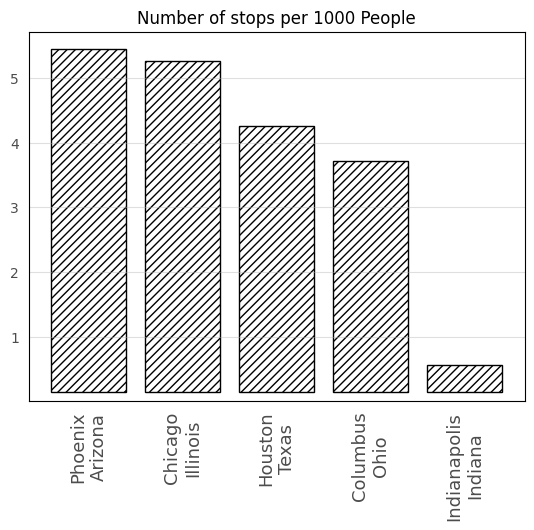

In [5]:
# number of stops per population
stops_res_dict = {key.split('\n')[0]: value for key, value in stops_res_dict.items()}

city_population_df = pd.read_csv("city_population.csv", usecols=["City", "State", "Population"])

city_population_df = city_population_df[city_population_df["Population"] > 800000]

city_population_df["stops"] = city_population_df["City"].map(stops_res_dict)

#city_population_df.dropna(inplace = True)

city_population_df["per_capita"] = city_population_df["stops"] / city_population_df["Population"]

city_population_df.sort_values(by = "per_capita", ascending=False, inplace= True)

city_population_df["city_and_state"] = city_population_df["City"] +"\n" + city_population_df["State"]

res_per_capita_dict = city_population_df[["city_and_state", "per_capita"]].head(5).to_dict(orient = "list")

plt.bar(res_per_capita_dict["city_and_state"], [ i* 1000 for i in res_per_capita_dict["per_capita"]], color = "white", edgecolor = "black", clip_on = False, bottom=[0.15]*5, hatch = "////")
plt.xticks(rotation=90, ha='center', fontsize = 13, alpha = 0.7)
plt.yticks(fontsize = 10, alpha = 0.7)
plt.ylim(ymin=0)
plt.grid(which = "major", axis = "y", alpha = 0.4)
plt.box(True)
plt.tick_params(bottom = False)
plt.tick_params(left = False)
plt.gca().yaxis.get_major_ticks()[0].label1.set_visible(False)
plt.title("Number of stops per 1000 People")
plt.show()

             City         State  Population     trips  per_capita_trips
53   Philadelphia  Pennsylvania     1553165  0.017640      1.135745e-08
59         Dallas         Texas     1257676  0.000395      3.140714e-10
126      Columbus          Ohio      822553  0.318814      3.875908e-07
153   San Antonio         Texas     1409019       NaN               NaN
170  Jacksonville       Florida      842583       NaN               NaN


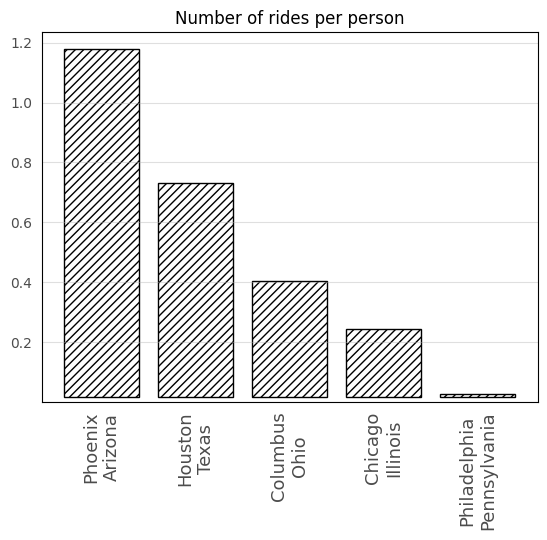

In [6]:
# number of rides per population #NOTE Trips dictionary is off by a factor of 1mio, because it was divided in cell 3
trips_res_dict = {key.split('\n')[0]: value for key, value in trips_res_dict.items()}

city_population_df = pd.read_csv("city_population.csv", usecols=["City", "State", "Population"])

city_population_df = city_population_df[city_population_df["Population"] > 800000]

city_population_df["trips"] = city_population_df["City"].map(trips_res_dict)

#city_population_df.dropna(inplace = True)

city_population_df["per_capita_trips"] = city_population_df["trips"] / city_population_df["Population"]

print(city_population_df.head())

city_population_df.sort_values(by = "per_capita_trips", ascending=False, inplace= True)

city_population_df["city_and_state"] = city_population_df["City"] +"\n" + city_population_df["State"]

res_per_capita_dict = city_population_df[["city_and_state", "per_capita_trips"]].head(5).to_dict(orient = "list")

plt.bar(res_per_capita_dict["city_and_state"], [ i* 1000000 for i in res_per_capita_dict["per_capita_trips"]], color = "white", edgecolor = "black", clip_on = False, bottom=[0.015]*5, hatch = "////")
plt.xticks(rotation=90, ha='center', fontsize = 13, alpha = 0.7)
plt.yticks(fontsize = 10, alpha = 0.7)
plt.ylim(ymin=0)
plt.grid(which = "major", axis = "y", alpha = 0.4)
plt.box(True)
plt.tick_params(bottom = False)
plt.tick_params(left = False)
plt.gca().yaxis.get_major_ticks()[0].label1.set_visible(False)
plt.title("Number of rides per person")
plt.show()

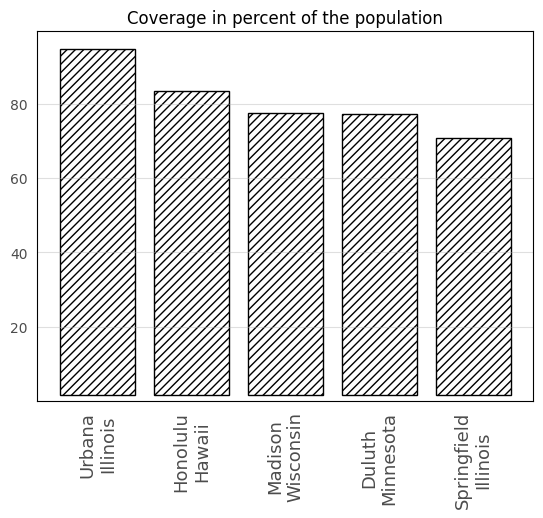

In [7]:
# plotting umkreis dingsda

df = pd.read_csv("Umkreisdata.csv")
df = df.dropna()
df.sort_values("percentage", inplace = True, ascending = False)

df["name"] = df["name"].apply(lambda x: x.split("_")[-1] +"\n" +x.split("_")[1])

xlist = df["name"].to_list()[0:5]
ylist = df["percentage"].to_list()[0:5] 

plt.bar(xlist, ylist, color = "white", edgecolor = "black", clip_on = False, bottom=[1.5]*5, hatch = "////")
plt.xticks(rotation=90, ha='center', fontsize = 13, alpha = 0.7)
plt.yticks(fontsize = 10, alpha = 0.7)
plt.ylim(ymin=0)
plt.grid(which = "major", axis = "y", alpha = 0.4)
plt.box(True)
plt.tick_params(bottom = False)
plt.tick_params(left = False)
plt.gca().yaxis.get_major_ticks()[0].label1.set_visible(False)
plt.title("Coverage in percent of the population")
plt.show()

plt.show()





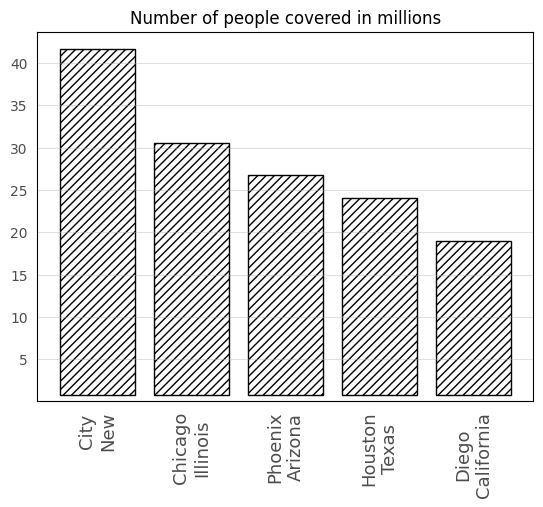

In [8]:
# plotting umkreis dingsda

df = pd.read_csv("Umkreisdata.csv")
df = df.dropna()
df.sort_values("positives", inplace = True, ascending = False)

df["name"] = df["name"].apply(lambda x: x.split("_")[-1] +"\n" +x.split("_")[1])

xlist = df["name"].to_list()[0:5]
ylist = df["positives"].to_list()[0:5] 

plt.bar(xlist,[i / 1e5 for i in ylist], color = "white", edgecolor = "black", clip_on = False, bottom=[0.75]*5, hatch = "////")
plt.xticks(rotation=90, ha='center', fontsize = 13, alpha = 0.7)
plt.yticks(fontsize = 10, alpha = 0.7)
plt.ylim(ymin=0)
plt.grid(which = "major", axis = "y", alpha = 0.4)
plt.box(True)
plt.tick_params(bottom = False)
plt.tick_params(left = False)
plt.gca().yaxis.get_major_ticks()[0].label1.set_visible(False)
plt.title("Number of people covered in millions")
plt.show()

# TODO only show 4 xticks
plt.show()



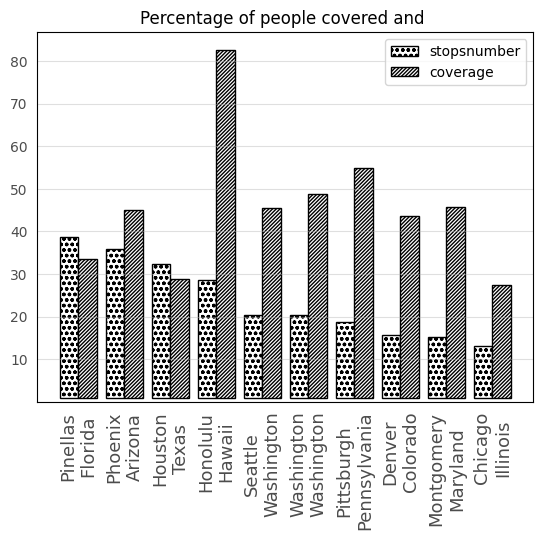

In [57]:
# grouped barchart

# number of stops
stops_res_dict = dict(sorted(counting.items(), key=lambda x: x[1], reverse = True))
df.sort_values("stops", inplace = True, ascending = False)

# convert to df
df["stops"] = df["name"].map(stops_res_dict)
df = df.dropna()
# number of cols
cols = 10
x = np.arange(cols)

# data
citynames = df["name"].to_list()[0:cols]
coverage = df["percentage"].to_list()[0:cols]
stopsnumber = df["stops"].to_list()[0:cols]

# stopsnumber is in millions
stopsnumber = [20 * i for i in stopsnumber]

plt.bar(x-0.2, stopsnumber, 0.4,color = "white", edgecolor = "black", clip_on = False, bottom=[0.75]*cols, hatch = "ooo")
plt.bar(x+0.2, coverage, 0.4, color = "white", edgecolor = "black", clip_on = False, bottom=[0.75]*cols, hatch = "/////////")
plt.xticks(x, citynames, rotation=90, ha='center', fontsize = 13, alpha = 0.7)
plt.yticks(fontsize = 10, alpha = 0.7)
plt.ylim(ymin=0)
plt.grid(which = "major", axis = "y", alpha = 0.4)
plt.box(True)
plt.tick_params(bottom = False)
plt.tick_params(left = False)
plt.gca().yaxis.get_major_ticks()[0].label1.set_visible(False)
plt.title("Percentage of people covered and ")
plt.legend(["stopsnumber", "coverage"])

plt.show()

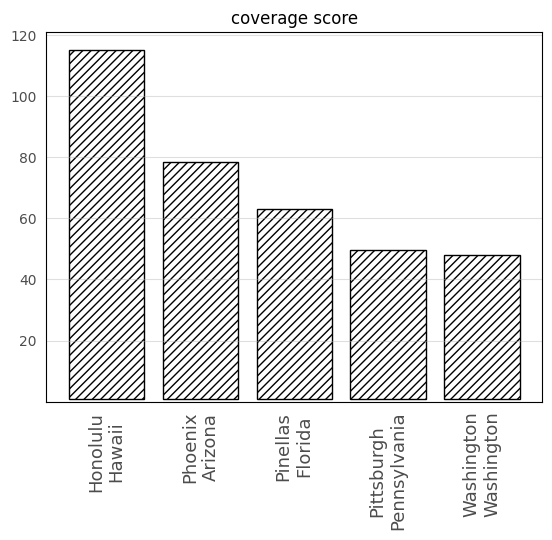

In [59]:
df["coverage_score"] = df["percentage"] * df["stops"]

df.sort_values("coverage_score", inplace = True, ascending = False)

plt.bar(df["name"].tolist()[0:5], df["coverage_score"].to_list()[0:5], color = "white", edgecolor = "black", clip_on = False, bottom=[0.75]*5, hatch = "////")
plt.xticks(rotation=90, ha='center', fontsize = 13, alpha = 0.7)
plt.yticks(fontsize = 10, alpha = 0.7)
plt.ylim(ymin=0)
plt.grid(which = "major", axis = "y", alpha = 0.4)
plt.box(True)
plt.tick_params(bottom = False)
plt.tick_params(left = False)
plt.gca().yaxis.get_major_ticks()[0].label1.set_visible(False)
plt.title("coverage score")

plt.show()

In [ ]:
# TODO instead of trying to calculate one unified score, just rank the cities among each other. 
https://www.oliverwymanforum.com/content/dam/oliver-wyman/ow-forum/template-scripts/urban-mobility-index/PDF/Mobility-Index-Report.pdf